#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [1]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp
%pip install pandas

In [2]:
# Importando o Sistema Imunológico Artificial de Reconhecimento.
from aisp.CSA import AIRS

# Importando os demais pacotes. 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Função para normalizar os dados entre 0 e 1**

In [3]:
# função para normalizar os dados utilizando funções do scikit-learn.
def normalize_dados(dados):
    scaler = MinMaxScaler().fit(dados)
    return scaler.transform(dados)

#### **3. Carregar a base de dados usando o pacote seaborn**

Carregando a base de dados "iris" através da biblioteca Seaborn. Iris contém quatro características florais, ou seja, o tamanho e a largura das sépalas e pétalas. Logo, existe três variedades de saída para essas amostras: setosa, versicolor e virginica.
Essa base de dados também está disponível nos seguintes links, [kaggle](https://www.kaggle.com/datasets/uciml/iris) e [UCIML](http://archive.ics.uci.edu/dataset/53/iris)

Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

In [4]:
amostrasName = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris = sns.load_dataset('iris')
dados = np.array(iris.get(amostrasName))
classes = np.array(iris.get('species'))

#### **4. Pré-processamento (Escala das entradas [0, 1])**

##### **4.1 Separação de treinamento e teste (30% para teste)**

Celula responsável pela normalização dos dados para valores entre 0 e 1 e pela separação dos conjuntos de treinamento e teste.

In [5]:
# Normalizando os dados entre 0 e 1.
dados = normalize_dados(dados)
# Gerando os conjuntos de treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.30)

#### **5. Validação Cruzada.**

O desempenho do modelo é avaliado por meio de validação cruzada. Em cada iteração, 10% dos dados de treinamento são reservados para teste.

In [6]:
accuracy_list = list()

# Inicialização do Modelo
airs = AIRS(max_iters=200, rate_clonal=50)
for i in range(0, 50):
    # Dividir o conjunto de treinamento, separando 1/10 dos dados para validação.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Ajustar o modelo usando os outros 90% dos dados
    airs.fit(train_model_x, train__model_y, verbose=False)

    # Calculo de acurácia para conjunto de validação: 
    prev_y = airs.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Exibir a acurácia média e seu desvio padrão
print(f"A acurácia media é: {np.average(np.array(accuracy_list)):.6f}")
print(f"Desvio padrão das acurácias: {np.std(np.array(accuracy_list)):.6f}")

A acurácia media é: 0.936364
Desvio padrão das acurácias: 0.060984


**6. Ajuste do modelo usando o conjunto de treinamento no seu total**

In [7]:
# Criando o modelo com todos os dados separados para treinamento.
airs.fit(train_x, train_y)
print('Modelo Total Ajustado!')

✔ Set of memory cells for classes (setosa, versicolor, virginica) successfully generated:  ┇██████████┇ 105/105 memory cells for each aᵢ

Modelo Total Ajustado!


**7. Exibir relatório e matriz de confusão para o conjunto de teste**

A acurácia é 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



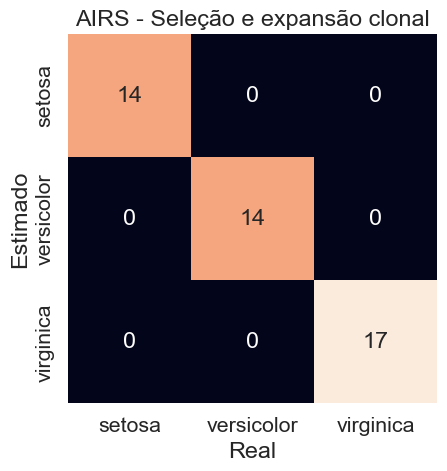

In [8]:
# Prevendo às classes com as amostras de teste.
prev_y = airs.predict(test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acurácia é {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.set(font_scale=1.4) 
plt.title("AIRS - Seleção e expansão clonal")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=airs.classes, yticklabels=airs.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()